In [2]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

## 셀린느

In [40]:
mag_ce = pd.read_csv('./magazine/final/magazine_ce_stickword.csv', sep ='|', encoding = 'utf-8')

In [41]:
mag_ce

,magazine,brand,title,link,date,word_celine,ADFN,ADFN_2
0,A,Ce,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-11-10,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백..."
1,A,Ce,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-11-06,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","['빈티지', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CE..."
2,A,Ce,남자 백’까지 갖고 싶어,http://www.allurekorea.com/2020/11/04/%eb%82%a...,2020-11-04,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","['대', 에스닉, '분위기', '물씬', 'CELINE', '방패', '모양', ..."
3,A,Ce,예림-예리,http://www.allurekorea.com/2020/11/03/%ec%98%8...,2020-11-03,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '..."
4,A,Ce,"GOOD TIME, 헨리",http://www.allurekorea.com/2020/10/26/good-tim...,2020-10-26,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ..."
...,...,...,...,...,...,...,...,...
759,W,Ce,G의 역습,http://www.wkorea.com/2016/11/15/g%ec%9d%98-%e...,2016-11-15,마야 셀리아 샐리(MAYA CELIA SALLY)N2017 S/S CELINE의 쇼...,"['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', 'S...","['마야', '셀', '리아', 'Maya', 'Celia', 'Sally', SS..."
760,W,Ce,잊지 마 2,http://www.wkorea.com/2016/09/28/%ec%9e%8a%ec%...,2016-09-28,"코리아 파워, 록(ROKH)N지난해 S/S에 파리에서 데뷔한 32세 한국 디자이너 ...","['코리아', '파워', '록', 'Rokh', '지난해', 'S', 'S', '파...","['코리아', '파워', '록', 'Rokh', '지난해', SS, '파리', '데..."
761,W,Ce,사고 말겠어!,http://www.wkorea.com/2016/09/21/%ec%82%ac%ea%...,2016-09-21,패션 에디터 김신N가을이 다가오니 괜스레 감상적이 된다. 정제된 보헤미안 감성과 함...,"['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '...","['패션', '에디터', '김신', '가을', '괜스레', '감상', '정제', '..."
762,W,Ce,남다르게,http://www.wkorea.com/2016/09/08/%eb%82%a8%eb%...,2016-09-08,"허리에 가방N주머니인 듯 아닌 듯, 벨트인 듯 아닌 듯 허리 가방’에 새로운 생명을...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',...","['허리', '가방', '주머니', '듯', '아닌', '듯', '벨트', '듯',..."


In [42]:
mag_ce['word'] = mag_ce['word_celine']

In [43]:
mag_CE = mag_ce[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

## 제니

### 제니 (유튜브 + 매거진)

In [44]:
tot_je = pd.read_csv('./magazine/final/video_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [45]:
tot_je['word'] = tot_je['word_jenny']

In [46]:
tot_JE = tot_je[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [47]:
len(tot_JE)

351

### 셀린느 + 제니

In [48]:
CEJE = pd.concat([mag_CE, tot_JE])

In [49]:
CEJE.reset_index(drop = True, inplace = True)

In [50]:
CEJE.to_csv('./magazine/final/CEJE.csv', sep = '|', encoding = 'utf-8', index = False)

In [51]:
len(CEJE)

1115

## stopword 추가

In [52]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [53]:
sw_df.columns = ['stopword']

In [54]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [55]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [56]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [57]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해']
for w in add_0:
    stop_words.append(w)

In [58]:
add_1 = ['BLACKPINK', '리사', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [59]:
len(stop_words)

825

In [60]:
CEJE['ADFN_2'] = CEJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [61]:
noun_adj_list = []
for i in range(len(CEJE)):
    for word in CEJE.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [62]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9281), ('귀엽다', 2144), ('예쁘다', 1819), ('CELINE', 1749), ('사랑', 879), ('얼굴', 705), ('패션', 690), ('브랜드', 599), ('컬렉션', 581), ('옷', 562), ('스타일', 557), ('매력', 535), ('SLIMANE', 516), ('HEDI', 510), ('룩', 509), ('무대', 492), ('노래', 488), ('컬러', 479), ('CHANEL', 412), ('잘', 408), ('시즌', 390), ('아이돌', 385), ('디자이너', 375), ('백', 362), ('여자', 343), ('팬', 335), ('느낌', 333), ('여성', 330), ('가장', 322), ('젠득', 321), ('드레스', 318), ('눈', 310), ('팬츠', 301), ('쇼', 301), ('디자인', 297), ('대', 292), ('매치', 292), ('실력', 288), ('걸', 283), ('재킷', 280), ('모습', 275), ('남성', 274), ('영어', 272), ('장식', 271), ('머리', 263), ('아이템', 261), ('블랙', 257), ('지난', 253), ('처음', 253), ('모델', 249), ('앞머리', 245), ('연출', 238), ('코트', 237), ('새로운', 236), ('파리', 236), ('PHILO', 232), ('헤어', 225), ('PHOEBE', 224), ('좋은', 222), ('분위기', 219), ('최고', 216), ('디렉터', 216), ('예능', 211), ('랩', 210), ('첫', 208), ('봄', 202), ('시작', 201), ('그룹', 199), ('스타일링', 197), ('춤', 197), ('LAURENT', 195), ('포인트', 194), ('자체', 193), ('SAINT', 192)

In [63]:
count = Counter(noun_adj_list)

In [64]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('제니', 9281)
('귀엽다', 2144)
('예쁘다', 1819)
('CELINE', 1749)
('사랑', 879)
('얼굴', 705)
('패션', 690)
('브랜드', 599)
('컬렉션', 581)
('옷', 562)
('스타일', 557)
('매력', 535)
('SLIMANE', 516)
('HEDI', 510)
('룩', 509)
('무대', 492)
('노래', 488)
('컬러', 479)
('CHANEL', 412)
('잘', 408)
('시즌', 390)
('아이돌', 385)
('디자이너', 375)
('백', 362)
('여자', 343)
('팬', 335)
('느낌', 333)
('여성', 330)
('가장', 322)
('젠득', 321)
('드레스', 318)
('눈', 310)
('팬츠', 301)
('쇼', 301)
('디자인', 297)
('대', 292)
('매치', 292)
('실력', 288)
('걸', 283)
('재킷', 280)
('모습', 275)
('남성', 274)
('영어', 272)
('장식', 271)
('머리', 263)
('아이템', 261)
('블랙', 257)
('지난', 253)
('처음', 253)
('모델', 249)
('앞머리', 245)
('연출', 238)
('코트', 237)
('새로운', 236)
('파리', 236)
('PHILO', 232)
('헤어', 225)
('PHOEBE', 224)
('좋은', 222)
('분위기', 219)
('최고', 216)
('디렉터', 216)
('예능', 211)
('랩', 210)
('첫', 208)
('봄', 202)
('시작', 201)
('그룹', 199)
('스타일링', 197)
('춤', 197)
('LAURENT', 195)
('포인트', 194)
('자체', 193)
('SAINT', 192)
('표정', 192)
('복', 189)
('목소리', 185)
('완성', 184)
('멤버', 184)
('소재', 181)
(

In [65]:
top500 = pd.DataFrame(word_list)

In [66]:
top500.columns = ['word', 'count']

In [67]:
top500.to_csv('./CEJE_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [68]:
import matplotlib.pyplot as plt

In [69]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [70]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [71]:
from wordcloud import WordCloud

In [72]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

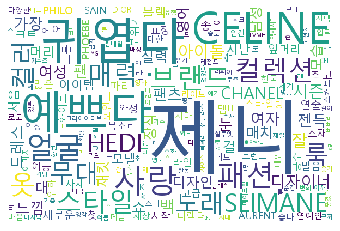

In [73]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CEJE.png')

In [74]:
CEJE.to_csv('./magazine/final/CEJE_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)